## Pre-Processing

1. Data Cleanup
2. Feature Extraction
3. Feature Engineering

In [1]:
# importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# importing output from exploratory_data_analysis notebook and converting to dataframe with datetime index
data = pd.read_csv('data_post_eda.csv', parse_dates=True, index_col='date')

## Rooms Temperature ($^\circ$C) & Humidity (%)

### Temperatures ($^\circ$C)

In [3]:
# making utility variables for room temp and room humidity
r_temps = [t for t in data.columns if 'R' in t]
r_humids = [h for h in data.columns if 'H_' in h and len(h) < 4]

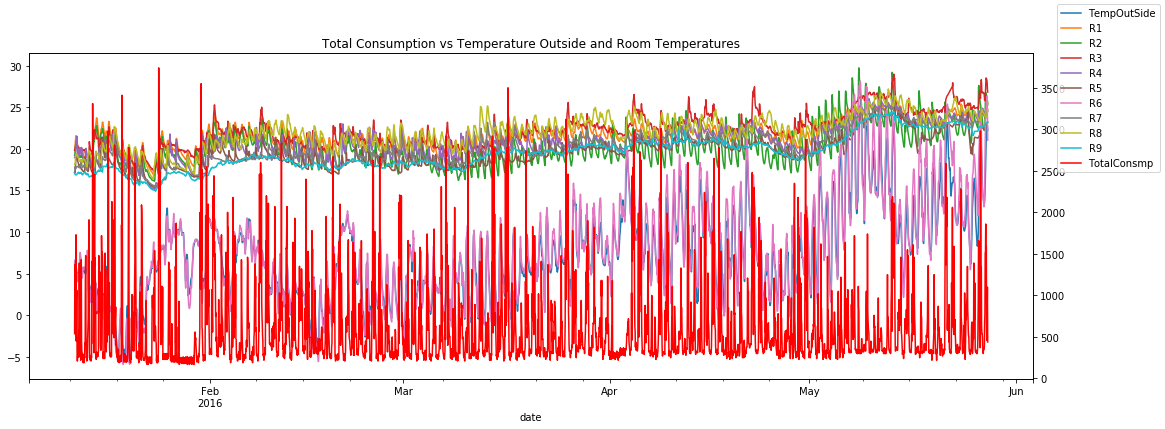

In [4]:
# during the exploratory data analysis process we noticed something weird with Room6, let's check
# plotting the indoor room temperatures throughout the 5 months
ax = data[['TempOutSide'] + r_temps].resample('H').mean().plot(figsize=(18,6), legend=False)
ax2 = ax.twinx()
data.TotalConsmp.resample('H').sum().plot(ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.title('Total Consumption vs Temperature Outside and Room Temperatures')
plt.show()

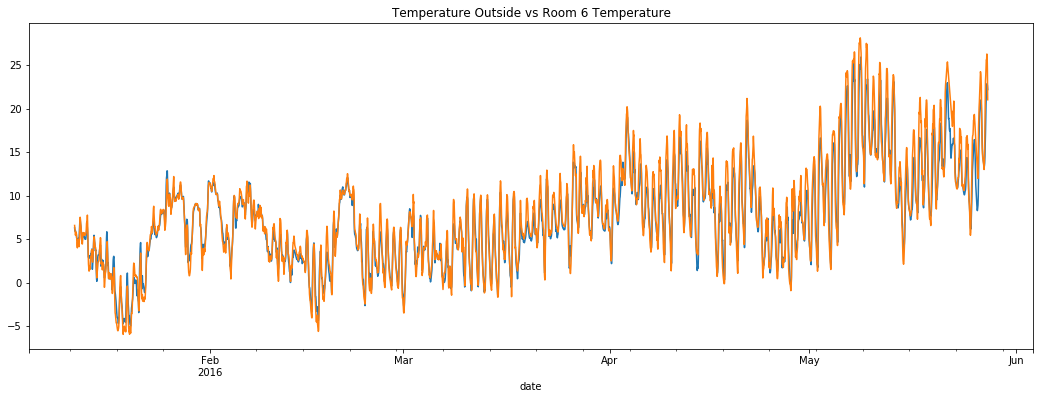

In [5]:
ax = data[['TempOutSide', 'R6']].resample('H').mean().plot(figsize=(18,6), legend=False)
plt.title('Temperature Outside vs Room 6 Temperature')
plt.show()

In [92]:
# Room 6 is practically identical to the outside temperature. This room was left open or the meter was set outdoors.

,TotalConsmp,TempOutSide,R6
TotalConsmp,1.000000,0.091733,0.109538
TempOutSide,0.091733,1.000000,0.974778
R6,0.109538,0.974778,1.000000


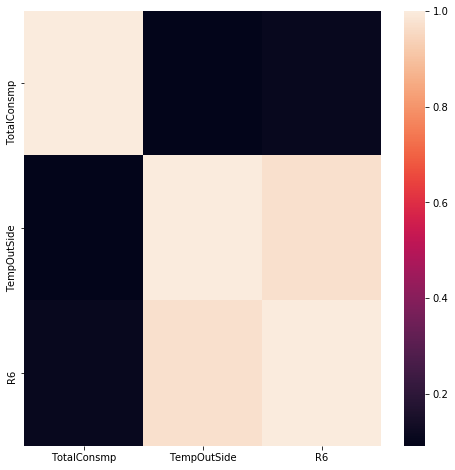

In [6]:
corr = data[['TotalConsmp', 'TempOutSide','R6']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
corr

As seen in the correlation heatmap, they have essentially the same values. We will drop the R6 column in favor of TempOutSide. Room 6 temperature is most likely a faulty meter/reading or some other discrepancy.

**dropping Room 6 Temperature — R6 Column**

In [7]:
# dropping R6 from the data DF
data.drop(['R6'], axis=1, inplace=True)

# dropping R6 from the utility variable r_temps that holds room temeprature column names 
r_temps.remove('R6')

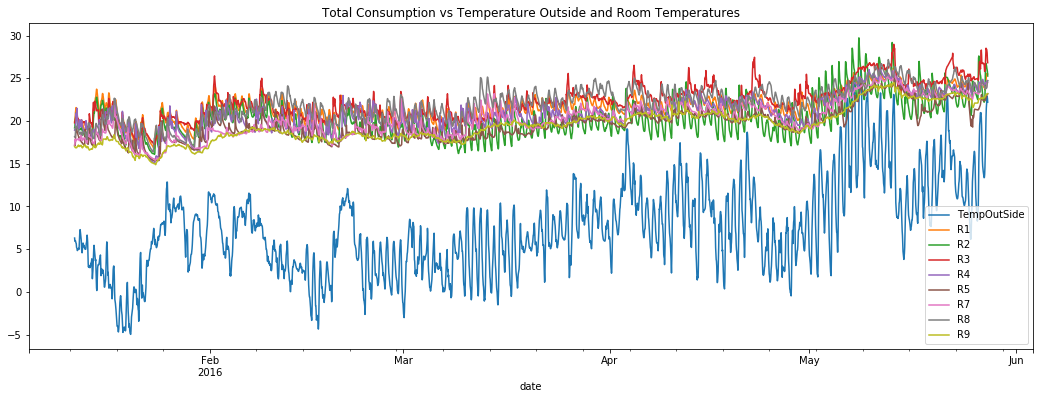

In [8]:
# let's look at the other Rooms temperatures
ax = data[['TempOutSide'] + r_temps].resample('H').mean().plot(figsize=(18,6))
plt.title('Total Consumption vs Temperature Outside and Room Temperatures')
plt.show()

/Users/alanarvelo/miniconda3/envs/tensorflow_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


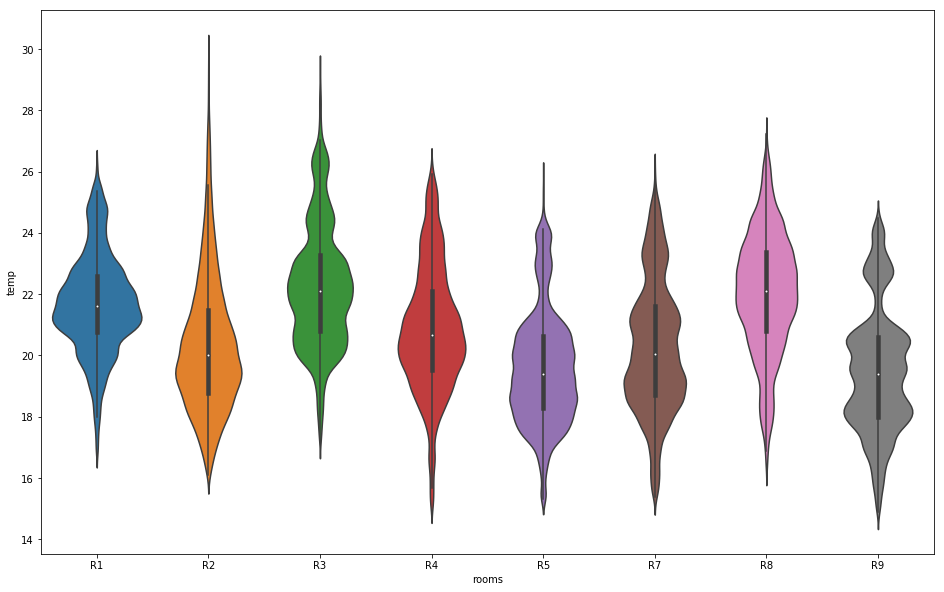

In [9]:
# let's examine its distribution more closely

temp_per_room = data[r_temps].melt(var_name='rooms', value_name='temp')
plt.figure(figsize=(16,10))
sns.violinplot(x='rooms', y='temp', data=temp_per_room)

In [10]:
data[r_temps].describe()

,R1,R2,R3,R4,R5,R7,R8,R9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,26.000000,27.230000,24.500000


,TotalConsmp,TempOutSide,R1,R2,R3,R4,R5,R7,R8,R9
TotalConsmp,1.000000,0.091733,0.052673,0.117511,0.076143,0.038891,0.013422,0.015052,0.033436,-0.002149
TempOutSide,0.091733,1.000000,0.682854,0.792247,0.699420,0.663479,0.651335,0.631300,0.502850,0.668218
R1,0.052673,0.682854,1.000000,0.836834,0.892402,0.877001,0.885247,0.838705,0.825413,0.844777
R2,0.117511,0.792247,0.836834,1.000000,0.735245,0.762066,0.720550,0.663660,0.578191,0.675535
R3,0.076143,0.699420,0.892402,0.735245,1.000000,0.852778,0.888169,0.847374,0.795283,0.901324
R4,0.038891,0.663479,0.877001,0.762066,0.852778,1.000000,0.871813,0.877763,0.796256,0.889439
R5,0.013422,0.651335,0.885247,0.720550,0.888169,0.871813,1.000000,0.870624,0.824981,0.911055
R7,0.015052,0.631300,0.838705,0.663660,0.847374,0.877763,0.870624,1.000000,0.882123,0.944776
R8,0.033436,0.502850,0.825413,0.578191,0.795283,0.796256,0.824981,0.882123,1.000000,0.869338
R9,-0.002149,0.668218,0.844777,0.675535,0.901324,0.889439,0.911055,0.944776,0.869338,1.000000


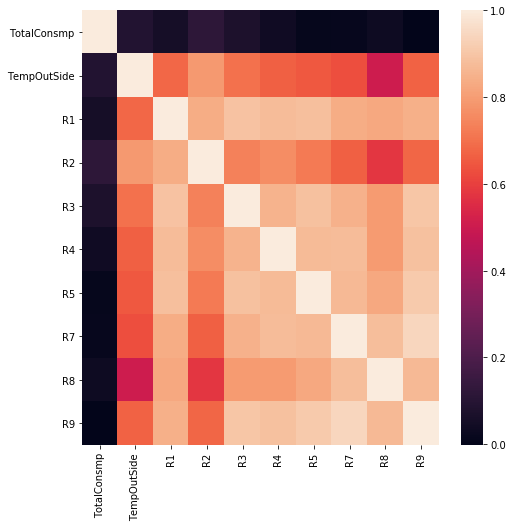

In [11]:
corr = data[['TotalConsmp', 'TempOutSide'] + r_temps].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
corr

As can be seen from the Violin Plot, the summary statistics and the heatmap, the remaining room temperatures are all very correlated, they all have similar mean, median, standard deviations, quartiles and confidence intervals. All rooms are also correlated to one another with the same Pearson correlation index of ~ 0.7.

Given that there is no need to carry around 8 columns that hold the same information. We will combine them into one representative Room temperatuve value by averaging their temperatures. 

Room 2 and TempOutSide have the highest covariance with our target variable. TempOutside will remain as it's own variable, but singling out Room2 to represent all rooms seems arbitrary and inpractical for the scalibility of this algorithm to entire ships.

**Combining Room Temperatures and dropping individuals**

In [12]:
# Computing the average temperature of all rooms at all times
data['R'] = data[r_temps].mean(axis=1)

# Dropping individual room temperatures
data.drop(r_temps, axis=1, inplace=True)

# Ruling out the utility variable 
r_temps = None

In [13]:
data.head(3)

,TotalConsmp,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,isDay,isWeekDay,R
date,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,90.0,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,41.626667,48.900000,45.53,6.60,733.5,92.0,7.000000,63.000000,True,True,18.435000
2016-01-11 17:10:00,90.0,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,41.560000,48.863333,45.56,6.48,733.6,92.0,6.666667,59.166667,True,True,18.439167
2016-01-11 17:20:00,80.0,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,41.433333,48.730000,45.50,6.37,733.7,92.0,6.333333,55.333333,True,True,18.421667


### Humidity (%)

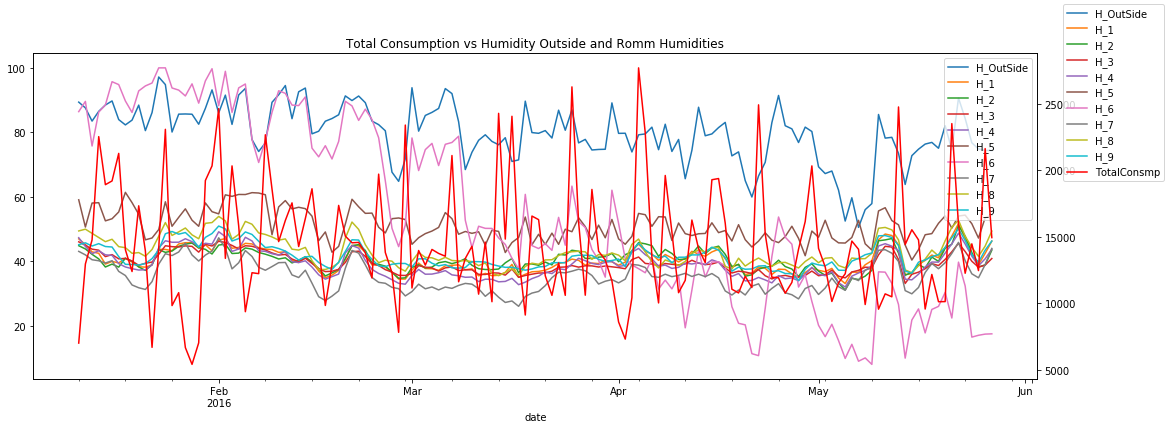

In [14]:
# during the exploratory data analysis process we noticed something weird with Room6, let's check
# plotting the indoor room temperatures throughout the 5 months
# Downsampled to Daily for graph clarity

ax = data[['H_OutSide'] + r_humids].resample('D').mean().plot(figsize=(18,6), legend=True)
ax2 = ax.twinx()
data.TotalConsmp.resample('D').sum().plot(ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.title('Total Consumption vs Humidity Outside and Romm Humidities')
plt.show()

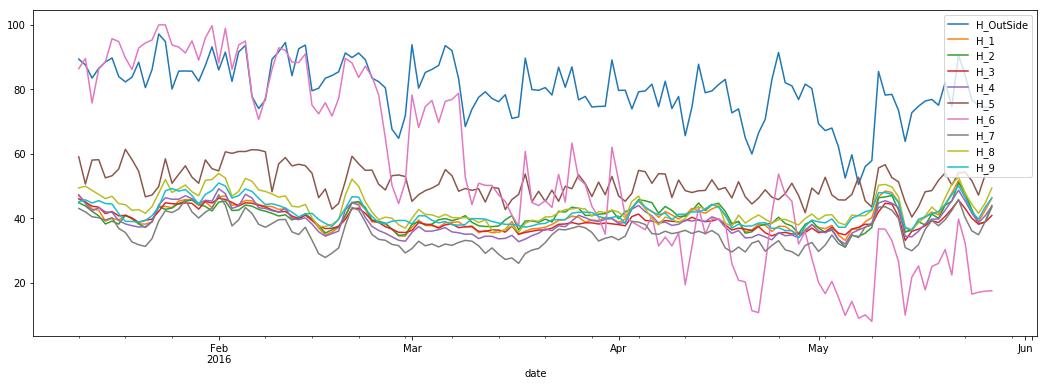

In [15]:
ax = data[['H_OutSide'] + r_humids].resample('D').mean().plot(figsize=(18,6), legend=True)

In [103]:
# again, Room 6 humidity covaries all throught — though in march decreases in magnitude — with the outside huimidity.

,TotalConsmp,H_OutSide,H_6
TotalConsmp,1.000000,-0.144363,-0.070009
H_OutSide,-0.144363,1.000000,0.718587
H_6,-0.070009,0.718587,1.000000


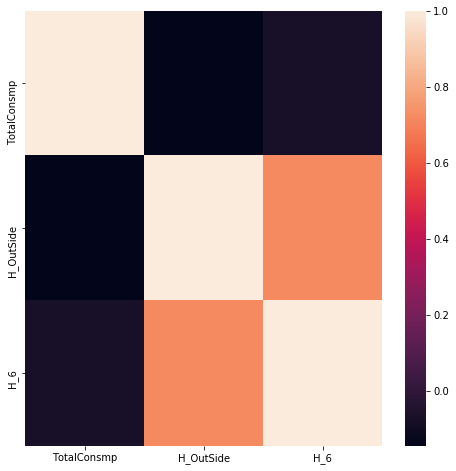

In [16]:
corr = data[['TotalConsmp', 'H_OutSide', 'H_6']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
corr

0.72 Pearson Correlation index between Humidity Outside % and Romm 6 Humidity %. Given that Room 6 temperature was dropped for being essentially equal to the outside temperature, I will go ahead and drop Room 6 humidity also.

**dropping Room 6 Humidity — H_6 Column**

In [17]:
# dropping R6 from the data DF
data.drop(['H_6'], axis=1, inplace=True)

# dropping R6 from the utility variable r_temps that holds room temeprature column names 
r_humids.remove('H_6')

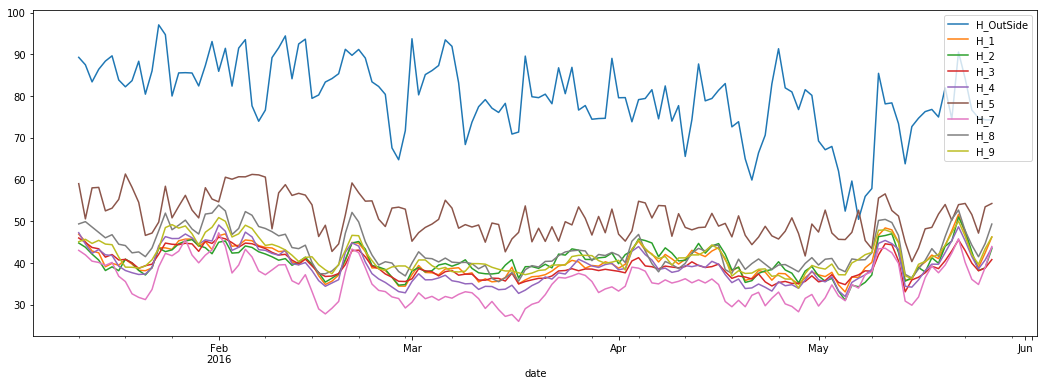

In [18]:
ax = data[['H_OutSide'] + r_humids].resample('D').mean().plot(figsize=(18,6), legend=True)

In [19]:
# Room 5 humidity is significantly higher than other Room's all throughout. Let's examine this more closely

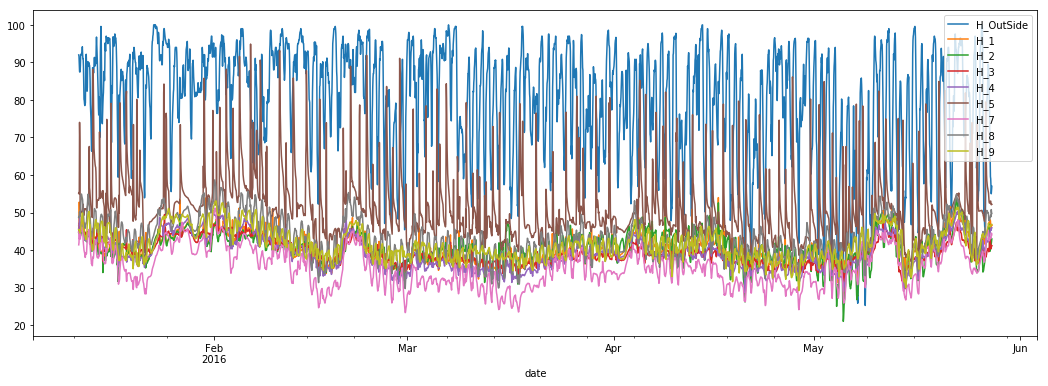

In [20]:
ax = data[['H_OutSide'] + r_humids].resample('H').mean().plot(figsize=(18,6), legend=True)

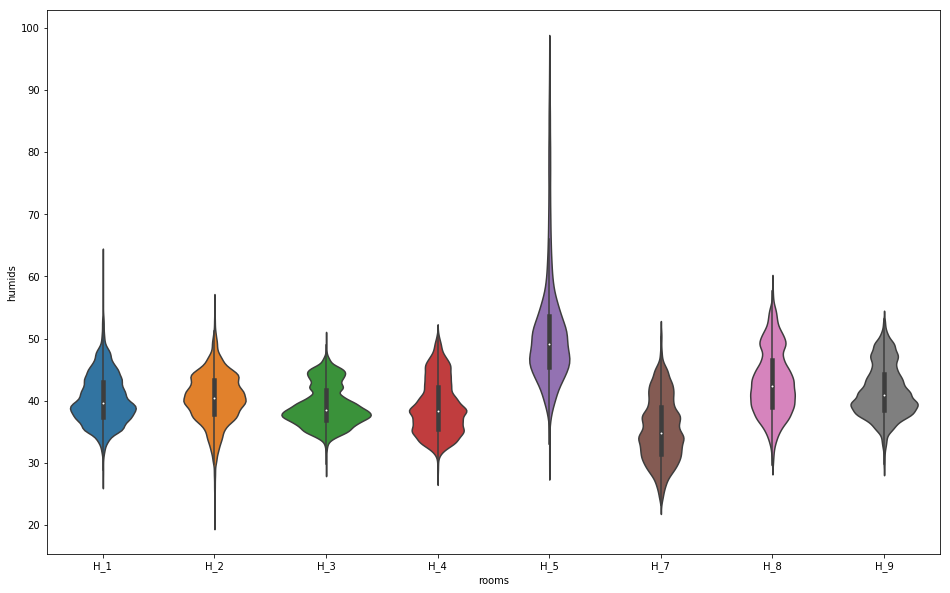

In [21]:
humids_per_room = data[r_humids].melt(var_name='rooms', value_name='humids')
plt.figure(figsize=(16,10))
sns.violinplot(x='rooms', y='humids', data=humids_per_room)

In [22]:
data[['H_OutSide'] + r_humids].describe()

,H_OutSide,H_1,H_2,H_3,H_4,H_5,H_7,H_8,H_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,79.750418,40.259739,40.420420,39.242500,39.026904,50.949283,35.388200,42.936165,41.552401
std,14.901088,3.979299,4.069813,3.254576,4.341321,9.022034,5.114208,5.224361,4.151497
min,24.000000,27.023333,20.463333,28.766667,27.660000,29.815000,23.200000,29.600000,29.166667
25%,70.333333,37.333333,37.900000,36.900000,35.530000,45.400000,31.500000,39.066667,38.500000
50%,83.666667,39.656667,40.500000,38.530000,38.400000,49.090000,34.863333,42.375000,40.900000
75%,91.666667,43.066667,43.260000,41.760000,42.156667,53.663333,39.000000,46.536000,44.338095
max,100.000000,63.360000,56.026667,50.163333,51.090000,96.321667,51.400000,58.780000,53.326667


,TotalConsmp,H_OutSide,H_1,H_2,H_3,H_4,H_5,H_7,H_8,H_9
TotalConsmp,1.000000,-0.144363,0.092634,-0.055513,0.045618,0.025402,0.017569,-0.051987,-0.091385,-0.051213
H_OutSide,-0.144363,1.000000,0.274126,0.584911,0.356192,0.336813,0.185941,0.378519,0.487355,0.359377
H_1,0.092634,0.274126,1.000000,0.797535,0.844677,0.880359,0.303258,0.801122,0.736196,0.764001
H_2,-0.055513,0.584911,0.797535,1.000000,0.678326,0.721435,0.250271,0.690584,0.679777,0.676467
H_3,0.045618,0.356192,0.844677,0.678326,1.000000,0.898978,0.375422,0.832685,0.828822,0.833538
H_4,0.025402,0.336813,0.880359,0.721435,0.898978,1.000000,0.352591,0.894301,0.847259,0.856591
H_5,0.017569,0.185941,0.303258,0.250271,0.375422,0.352591,1.000000,0.325808,0.359840,0.272197
H_7,-0.051987,0.378519,0.801122,0.690584,0.832685,0.894301,0.325808,1.000000,0.883984,0.858686
H_8,-0.091385,0.487355,0.736196,0.679777,0.828822,0.847259,0.359840,0.883984,1.000000,0.855812
H_9,-0.051213,0.359377,0.764001,0.676467,0.833538,0.856591,0.272197,0.858686,0.855812,1.000000


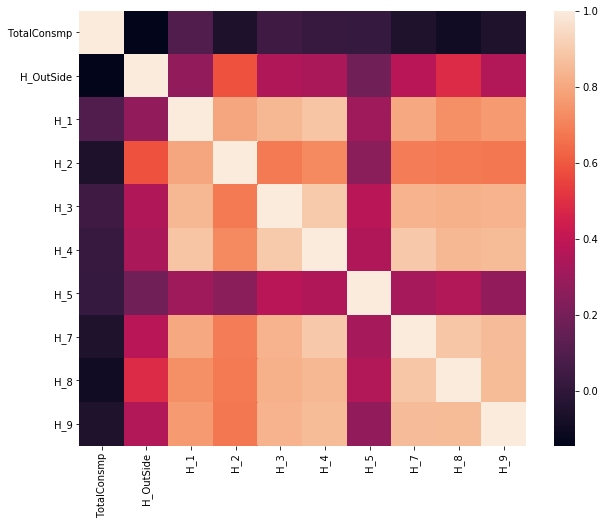

In [23]:
corr = data[['TotalConsmp', 'H_OutSide'] + r_humids].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)
corr

Room 5 does not covary with any other room but more importantly neither it does with the Target Variable. Given this weird behavior we will proceed to drop it and investigate further on. 

**Dropping Room 5 Humidity — H_5 Column**

In [112]:
# dropping R6 from the data DF
data.drop(['H_5'], axis=1, inplace=True)

# dropping R6 from the utility variable r_temps that holds room temeprature column names 
r_humids.remove('H_5')

**Combining all humidities**

In [113]:
# Computing the average temperature of all rooms at all times
data['H'] = data[r_humids].mean(axis=1)

# Dropping individual room temperatures
data.drop(r_humids, axis=1, inplace=True)

# Ruling out the utility variable 
r_humids = None

In [114]:
data.head()

,TotalConsmp,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility,isDay,isWeekDay,R,H
date,,,,,,,,,,
2016-01-11 17:00:00,90.0,6.60,733.5,92.0,7.000000,63.000000,True,True,18.435000,45.534286
2016-01-11 17:10:00,90.0,6.48,733.6,92.0,6.666667,59.166667,True,True,18.439167,45.454524
2016-01-11 17:20:00,80.0,6.37,733.7,92.0,6.333333,55.333333,True,True,18.421667,45.344762
2016-01-11 17:30:00,90.0,6.25,733.8,92.0,6.000000,51.500000,True,True,18.396250,45.237143
2016-01-11 17:40:00,100.0,6.13,733.9,92.0,5.666667,47.666667,True,True,18.408750,45.230476


visualizing and study the relationship between the engineered R (mean room temperature) and H (mean room humidity) with their outside counterparts.

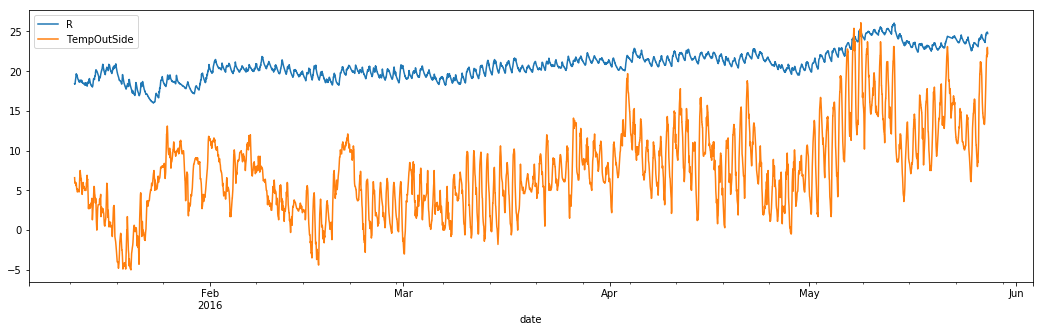

In [115]:
data[['R', 'TempOutSide']].plot(figsize=(18,5))

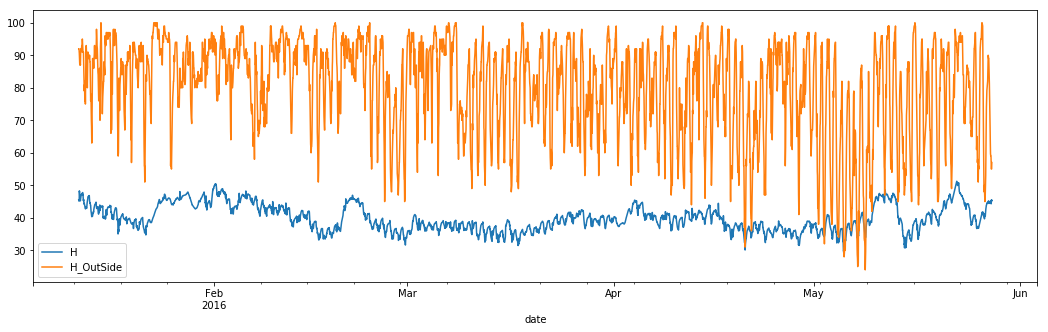

In [116]:
data[['H', 'H_OutSide']].plot(figsize=(18,5))

,TotalConsmp,TempOutSide,R,H_OutSide,H
TotalConsmp,1.000000,0.091733,0.047728,-0.144363,-0.020156
TempOutSide,0.091733,1.000000,0.721079,-0.574186,0.225203
R,0.047728,0.721079,1.000000,-0.387922,0.015785
H_OutSide,-0.144363,-0.574186,-0.387922,1.000000,0.438639
H,-0.020156,0.225203,0.015785,0.438639,1.000000


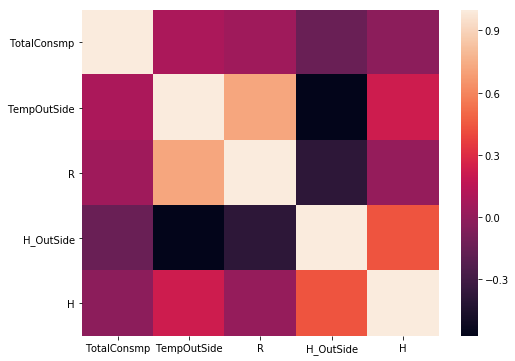

In [117]:
plt.figure(figsize=(8,6))
corr = data[['TotalConsmp', 'TempOutSide', 'R', 'H_OutSide', 'H']].corr()
sns.heatmap(corr)
corr

Valuable insights are obtained from this graph. The first is that Outside Temp and Outside Humidity are strongly & negatively (-0.57 pearson) correlated, the second that Outside Temp and Mean Room Temp are strongly & positively correlated (0.72 perason). 

Feature Engineering will proceed by substracting Outside Temperature (TempOutSide) from Mean Room Temperature (R) to create a new varibale called RTo ($RTo = R - TempOutSide) which holds the information of both in is effectively the temperature difference between Mean Room and Outside.

Outside Humidity will be left behind given that it has a lot of information already contained in TempOutside. 

In [118]:
# creating a combined temperature variable (R/TempOutSide)
data["RTo"] = data.R - data.TempOutSide

In [119]:
# dropping outdoor humidity, and other non necessary variables moving forward
data.drop(['H_OutSide', 'R', 'TempOutSide', 'isDay', 'isWeekDay'], axis=1, inplace=True)

In [120]:
data.head()

,TotalConsmp,Press_mm_hg,Windspeed,Visibility,H,RTo
date,,,,,,
2016-01-11 17:00:00,90.0,733.5,7.000000,63.000000,45.534286,11.835000
2016-01-11 17:10:00,90.0,733.6,6.666667,59.166667,45.454524,11.959167
2016-01-11 17:20:00,80.0,733.7,6.333333,55.333333,45.344762,12.051667
2016-01-11 17:30:00,90.0,733.8,6.000000,51.500000,45.237143,12.146250
2016-01-11 17:40:00,100.0,733.9,5.666667,47.666667,45.230476,12.278750


In [121]:
data.describe()

,TotalConsmp,Press_mm_hg,Windspeed,Visibility,H,RTo
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,101.496833,755.522602,4.039752,38.330834,39.832333,13.403031
std,104.380829,7.399441,2.451221,11.794719,3.929901,4.203444
min,10.000000,729.300000,0.000000,1.000000,29.264857,-1.280083
25%,50.000000,750.933333,2.000000,29.000000,36.826714,10.669479
50%,60.000000,756.100000,3.666667,40.000000,39.224490,13.590937
75%,100.000000,760.933333,5.500000,40.000000,42.698075,16.292639
max,1110.000000,772.300000,14.000000,66.000000,51.238571,24.172708


### Let's examine all remaining predictor variables.  

,TotalConsmp,Press_mm_hg,Windspeed,Visibility,H,RTo
TotalConsmp,1.000000,-0.035069,0.090156,0.001750,-0.020156,-0.095486
Press_mm_hg,-0.035069,1.000000,-0.235032,0.040315,-0.267507,0.115104
Windspeed,0.090156,-0.235032,1.000000,-0.007516,0.232437,-0.305180
Visibility,0.001750,0.040315,-0.007516,1.000000,0.007334,0.055989
H,-0.020156,-0.267507,0.232437,0.007334,1.000000,-0.278135
RTo,-0.095486,0.115104,-0.305180,0.055989,-0.278135,1.000000


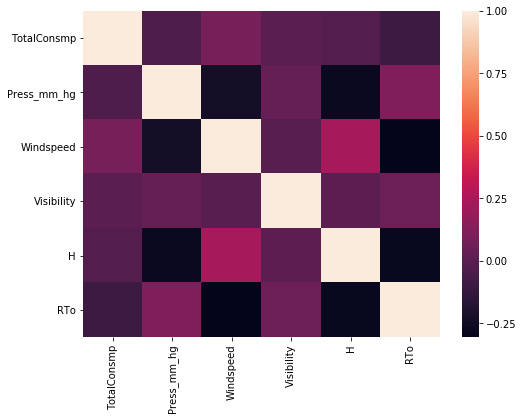

In [122]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)
corr

None of the remaining predictor variables are strongly correlated (with each other or with the target variable) meaning that they don't co-vary — change together — thus there is little redundant information (noise) in the system. This will help the algorithms to be used in the next notebook, Modeling, better predict the target variable. 

Instead of doing further Feature Engineering with this variables and risking over simplifying or we losing information we will let Dimensionality reduction techniques like PSA and Recursive Feature Elimination (RFE) — combined with Grid Search and Cross validation — decide which features describe/predict the target variable better

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 6 columns):
TotalConsmp    19735 non-null float64
Press_mm_hg    19735 non-null float64
Windspeed      19735 non-null float64
Visibility     19735 non-null float64
H              19735 non-null float64
RTo            19735 non-null float64
dtypes: float64(6)
memory usage: 1.1 MB


In [124]:
data.describe()

,TotalConsmp,Press_mm_hg,Windspeed,Visibility,H,RTo
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,101.496833,755.522602,4.039752,38.330834,39.832333,13.403031
std,104.380829,7.399441,2.451221,11.794719,3.929901,4.203444
min,10.000000,729.300000,0.000000,1.000000,29.264857,-1.280083
25%,50.000000,750.933333,2.000000,29.000000,36.826714,10.669479
50%,60.000000,756.100000,3.666667,40.000000,39.224490,13.590937
75%,100.000000,760.933333,5.500000,40.000000,42.698075,16.292639
max,1110.000000,772.300000,14.000000,66.000000,51.238571,24.172708


In [125]:
data.to_csv('data_post_preprocessing.csv')